In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

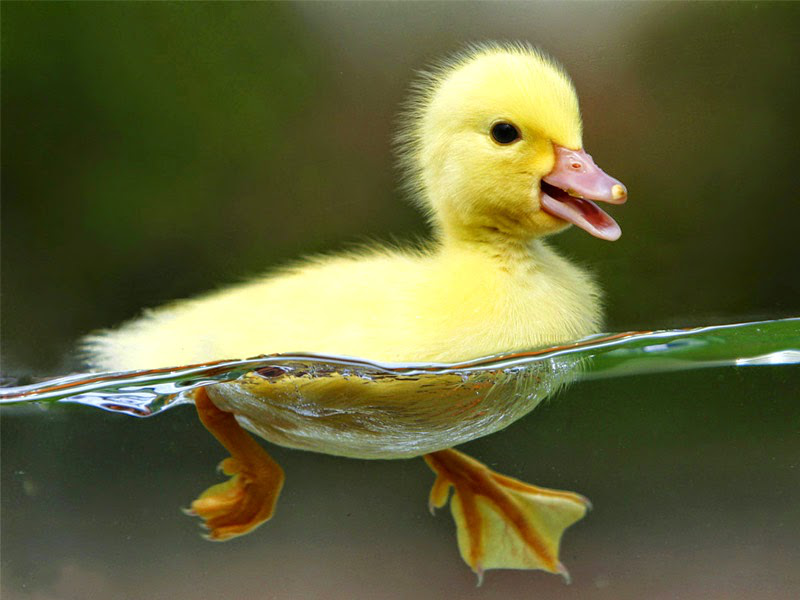

In [2]:
filename = 'input/bebek.jpg'

image = Image.open(filename)
image

In [3]:
pixel = np.array(image)
pixel.shape
pixel.dtype

dtype('uint8')

In [4]:
# Array of pixels to be calculated in histogram
pixel_r = np.zeros(pixel.shape[0:2], pixel.dtype)
pixel_g = np.zeros(pixel.shape[0:2], pixel.dtype)
pixel_b = np.zeros(pixel.shape[0:2], pixel.dtype)
pixel_gray = np.zeros(pixel.shape[0:2], pixel.dtype)

In [5]:
for i, row in enumerate(pixel):
    for j, pix in enumerate(row):
        pixel_r[i][j] = pix[0]
        pixel_g[i][j] = pix[1]
        pixel_b[i][j] = pix[2]
        pixel_gray[i][j] = np.uint8(pix.mean())

In [6]:
pixel_r = np.ndarray.flatten(pixel_r)
pixel_g = np.ndarray.flatten(pixel_g)
pixel_b = np.ndarray.flatten(pixel_b)
pixel_gray = np.ndarray.flatten(pixel_gray)

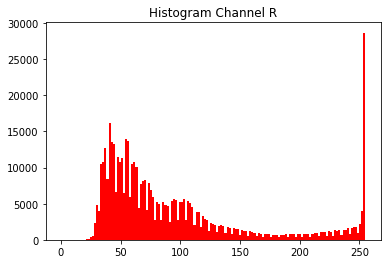

In [12]:
plt.hist(pixel_r, range= (0, 255), bins='auto', color='red')  # arguments are passed to np.histogram
plt.title("Histogram Channel R")
plt.show()

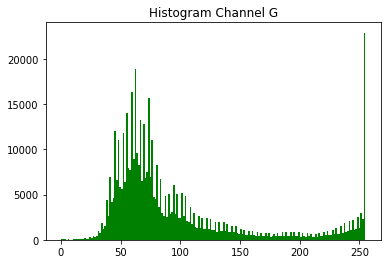

In [8]:
plt.hist(pixel_g, range= (0, 255), bins='auto', color='green')  # arguments are passed to np.histogram
plt.title("Histogram Channel G")
plt.show()

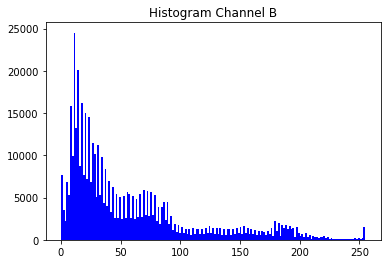

In [9]:
plt.hist(pixel_b, range= (0, 255), bins='auto', color='blue')  # arguments are passed to np.histogram
plt.title("Histogram Channel B")
plt.show()

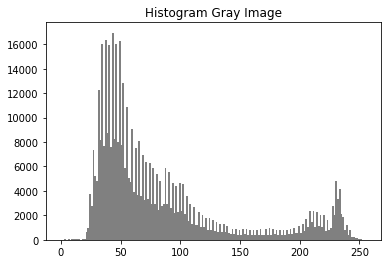

In [10]:
plt.hist(pixel_gray, range= (0, 255), bins='auto', color='gray')  # arguments are passed to np.histogram
plt.title("Histogram Gray Image")
plt.show()